# Exploring Video Game Sales

This dataset contains a list of video games with sales greater than 100,000 copies.

In this project I will deal only with exploratory analysis, where the objective is to understand how the data is distributed and generate insight for future decision-making, this analysis aims to explore as much as possible the data in a simple, intuitive and informative way. The data used in this project contains information only from 1980 to 2016.




### Data information : 
Rank - Ranking of overall sales, integer

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.), object

Year - Year of the game's release, float

Genre - Genre of the game ,object

Publisher - Publisher of the game, object

NA_Sales - Sales in North America (in millions), float

EU_Sales - Sales in Europe (in millions), float

JP_Sales - Sales in Japan (in millions), float

Other_Sales - Sales in the rest of the world (in millions), float

Global_Sales - Total worldwide sales, float

In [24]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

## Read the data

In [25]:
data = pd.read_csv('../data/vgsales.csv')

In [26]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Check for null values

In [28]:
data.isnull().sum()
# we could do data.dropna().shape

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Here we will keep the null values as we want the rows to analyze

## What genre games have been made the most?


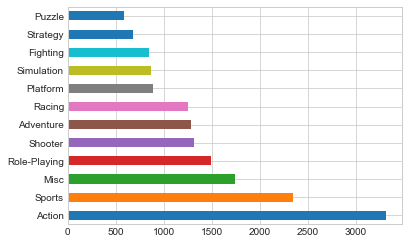

In [29]:
data.Genre.value_counts().plot.barh()

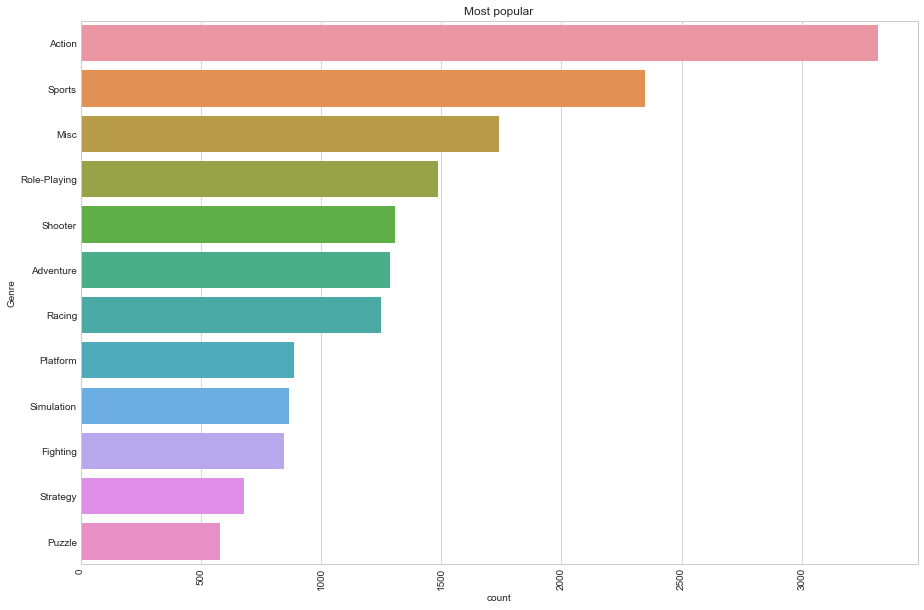

In [30]:
plt.figure(figsize=(15, 10))

order = data['Genre'].value_counts().index

ax=sns.countplot(y="Genre", data=data, order = order)
ax.set_title('Most popular')
plt.xticks(rotation=90)

plt.show()

**It seems people love the action and sports genre of games**

## Which year had the most game releases?

Replicate from the previous code

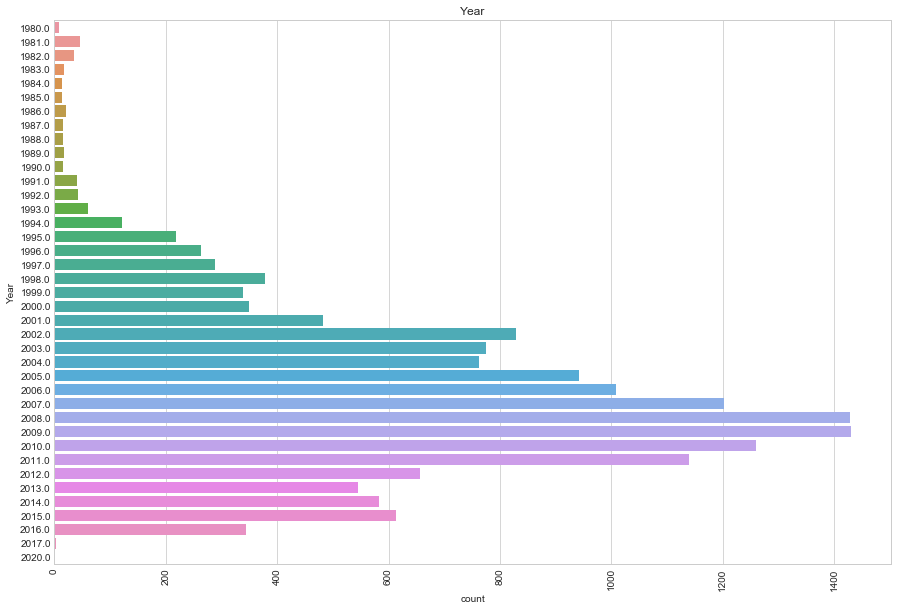

In [31]:
#YEAR has duplcate values
plt.figure(figsize=(15, 10))

#order = data['year'].value_counts().index

ax=sns.countplot(y="Year", data=data)
#or order -  data.Genre.value_counts().index
plt.xticks(rotation=90)
ax.set_title('Year')
plt.show()

## What are the top game genres produced for the years(5) with maximum game production?

Float64Index([2009.0, 2008.0, 2010.0, 2007.0, 2011.0], dtype='float64')


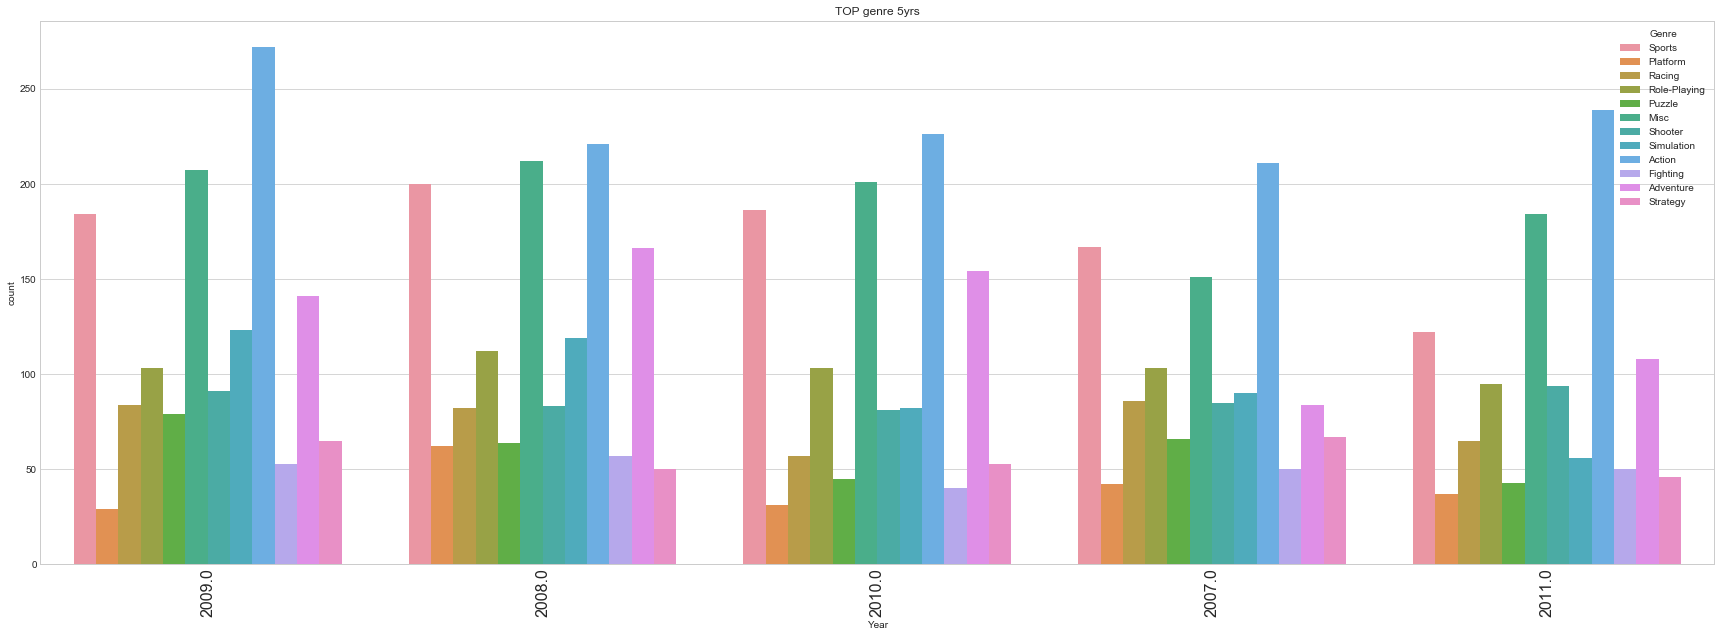

In [32]:
plt.figure(figsize=(30, 10))

order = data.Year.value_counts().iloc[:5].index

sns.countplot(x="Year", data=data, hue='Genre', order=order).set_title("TOP genre 5yrs")
plt.xticks(size=16, rotation=90)
print(order)
plt.show()

## Which genre game has sold the most in a single year?


In [37]:
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index() # to make it a table again
#print(this)
# Comparing with only the highest sales figure to get a binary value of true or false
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']


#OR
#year_sale_dx['Global_Sales']= year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) 

#
# Subsetting to keep only the highest value each year in the datframe
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

genre = year_sale_max['Genre']


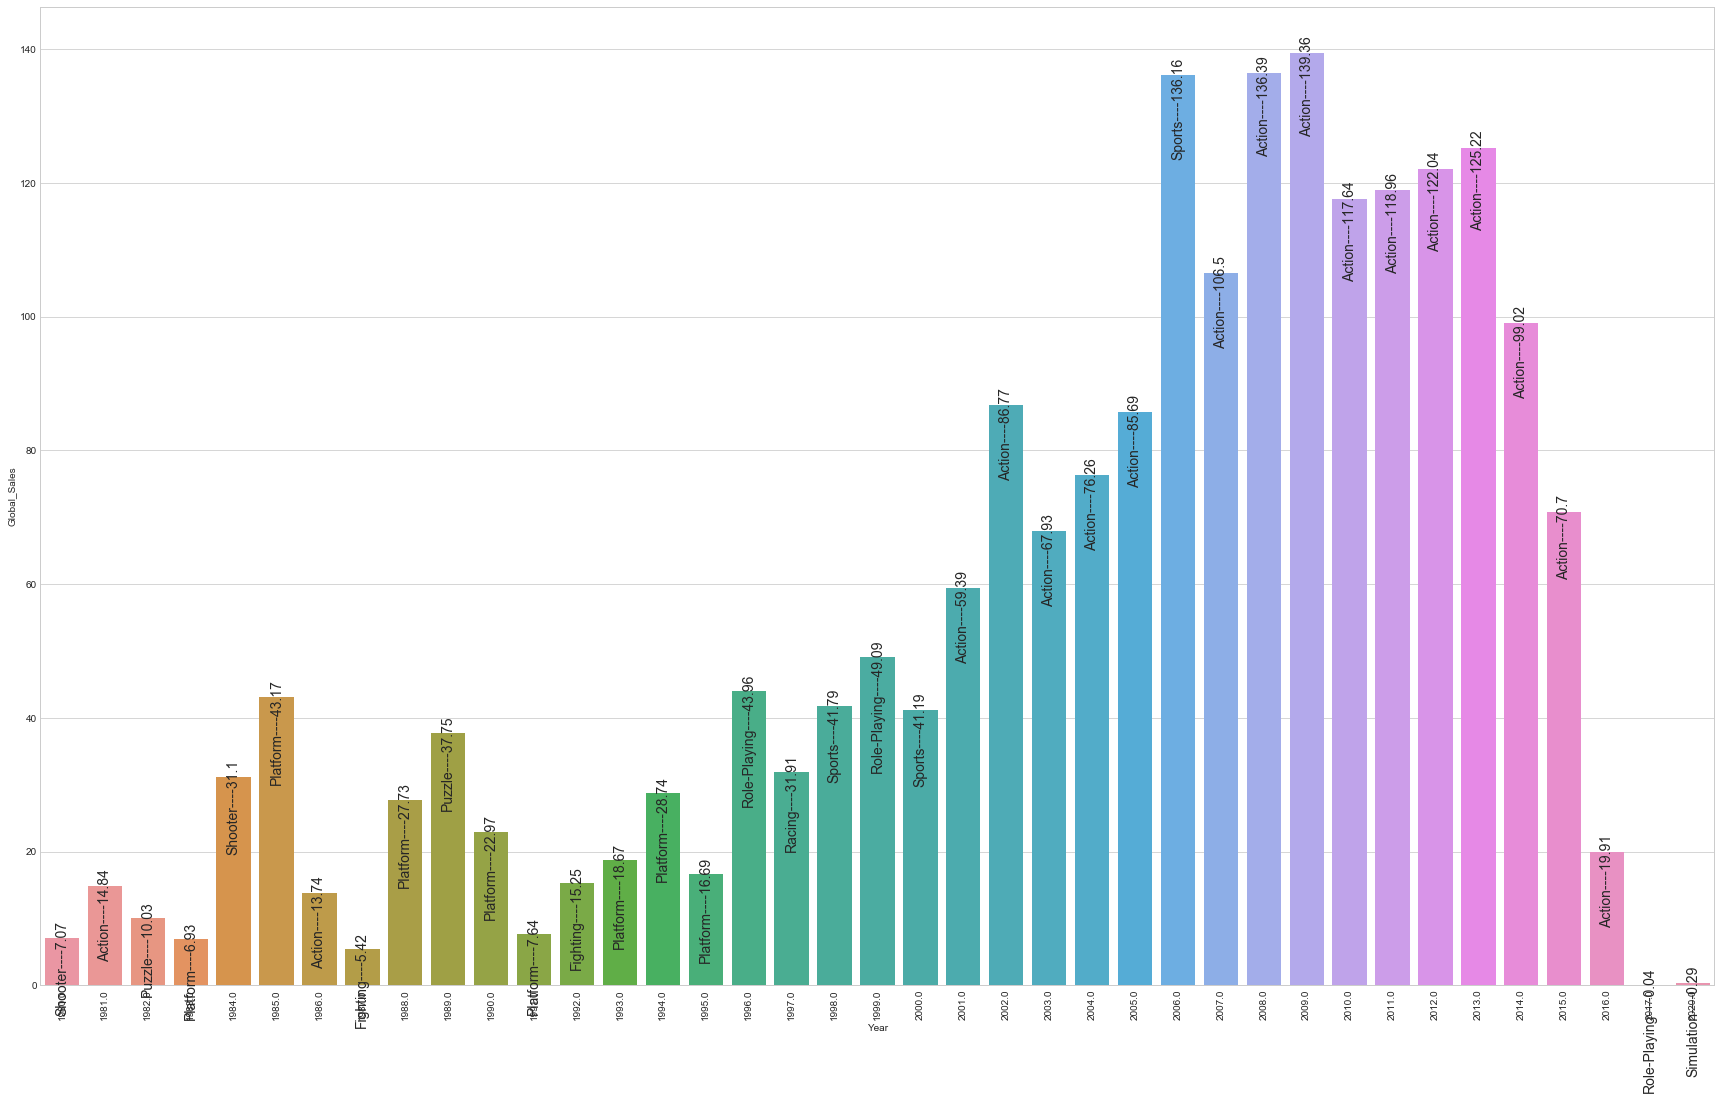

In [38]:
# plotting the bar for each year's highest genre

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)

# Adding values at the top of each bar
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))),  size=14, rotation= 90, ha="center")
    
    index += 1

plt.xticks(rotation=90)
plt.show()

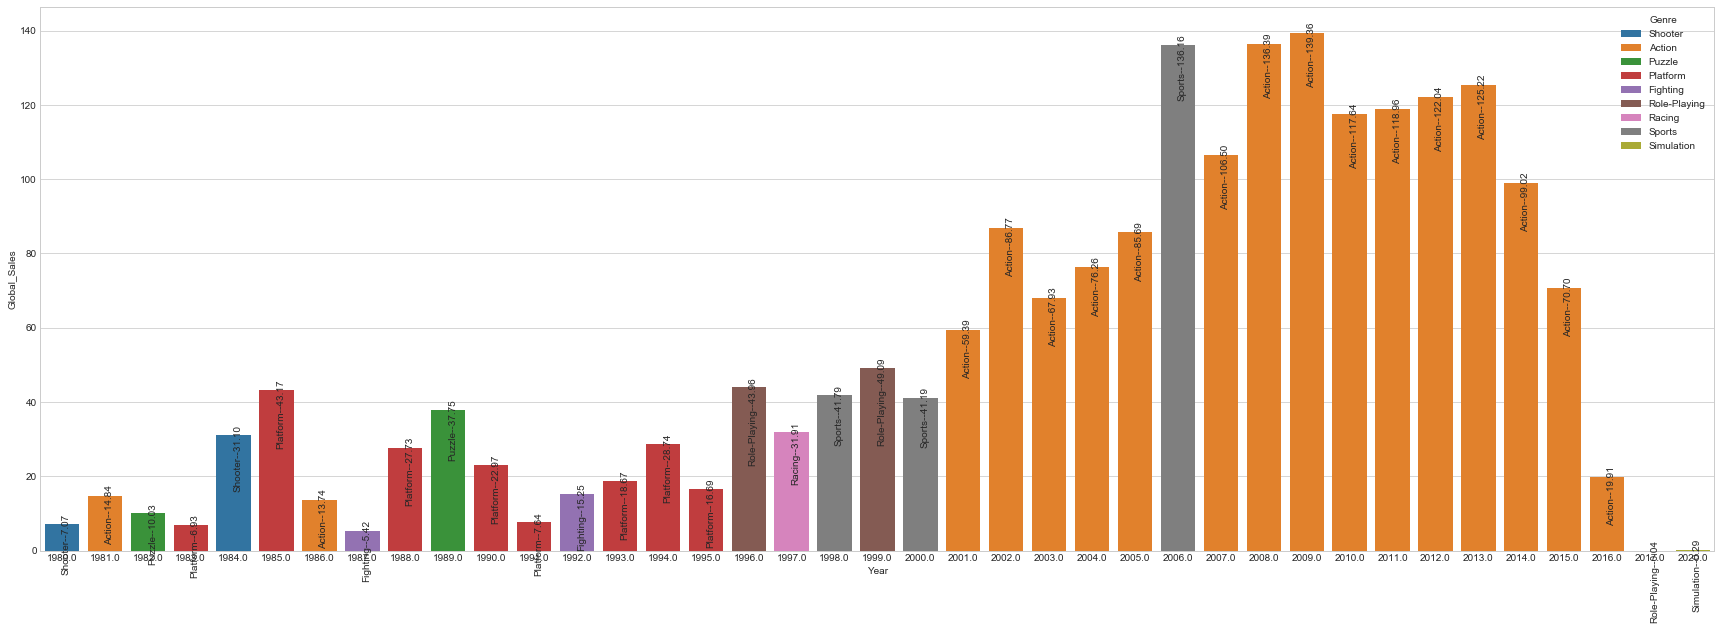

In [39]:
# OR the replacement for above
# Copied from Manish Kukreja
sales_by_year = (data
 .groupby(['Year','Genre'])
 .Global_Sales
 .sum()
 .reset_index()
)


sales_by_year['Max_Global_Sales'] = (sales_by_year
 .groupby('Year')
 .Global_Sales
 .transform(max)
)

max_sales_by_year = (sales_by_year
 .loc[sales_by_year.Global_Sales == sales_by_year.Max_Global_Sales]
 .drop(columns=['Max_Global_Sales'])
 .reset_index(drop=True)
)

max_sales_by_year
plt.figure(figsize=(30,10))

ax = sns.barplot(x="Year",
           y='Global_Sales',
            hue='Genre',
            dodge=False,
           data=max_sales_by_year)

for index in range(0, max_sales_by_year.shape[0]):
    value = max_sales_by_year.Global_Sales[index]
    genre = max_sales_by_year.Genre[index]
    ax.text(index, value + 1,
           '{}--{:.2f}'.format(genre, value),
           rotation=90)
#END of Manish Kukreja online changes

## Which platfrom have the highest sale price globally?

In [12]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()

data_platform = data_platform.reset_index()

data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)
# data_platform

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

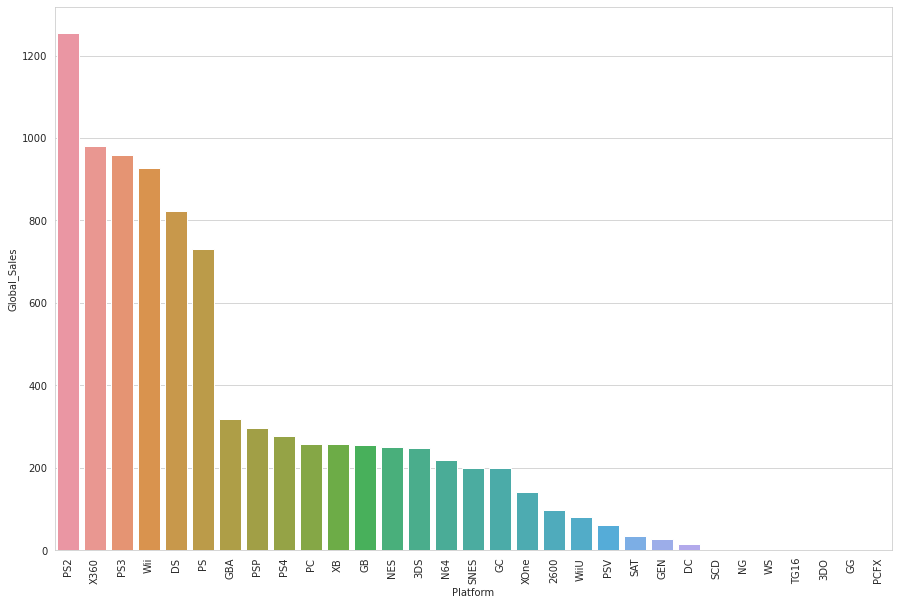

In [14]:
plt.figure(figsize=(15, 10))

sns.barplot(x="Platform", y="Global_Sales", data=data_platform)

plt.xticks(rotation=90)

##  Which individual game have the highest sale price globally?

In [15]:
# data is already sorted according to global sales
top_game_sale = data.head(20)

top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]

top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)
# top_game_sale

In [18]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

In [ ]:
## data.head(20).Globalsales.sort_values.plot()
## data.head(20).Globalsales.sort_values.plot(kind='bar')
#data.Name.nunique()
#data.GlobalSales.sort_values(ascending=False).head(20).plot.bar()
#data.Name.value_counts()


In [ ]:
# OR copy from the Manish's code later 

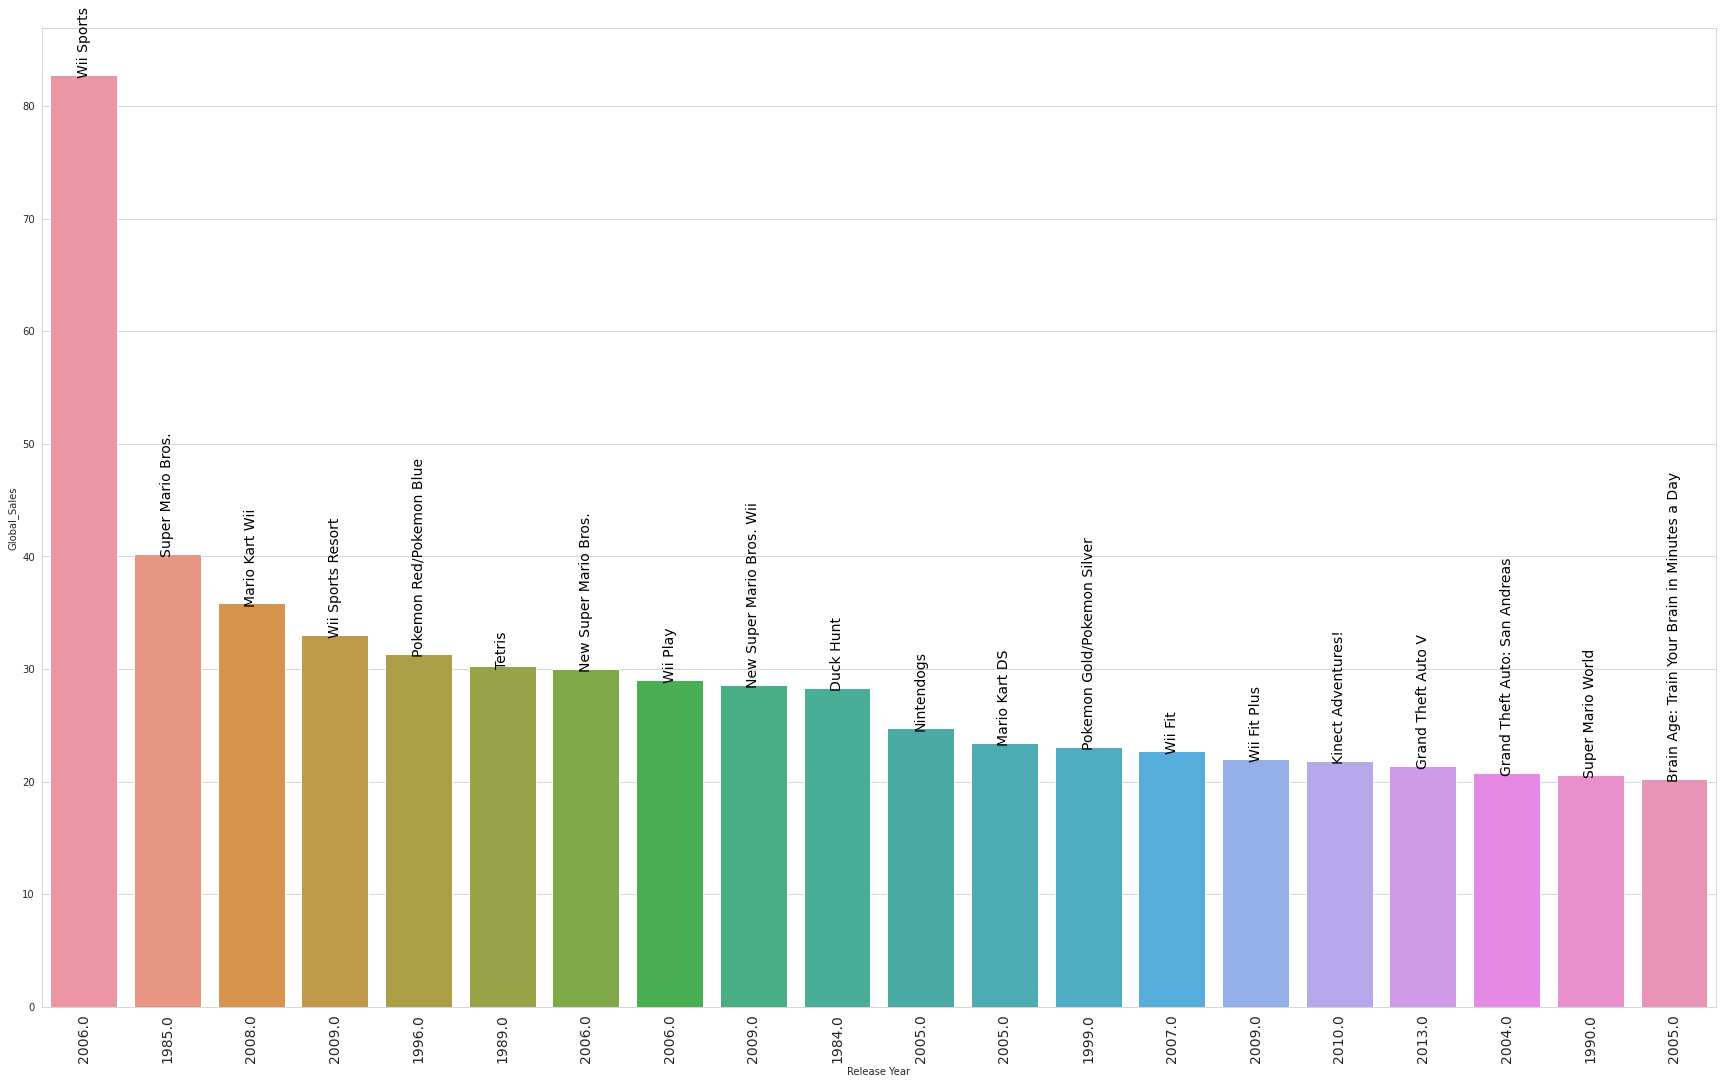

In [30]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()

## Find the total revenue by region

In [31]:
# subsetting the data to region
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# summing up the entire sales data as per region
top_sale_reg = top_sale_reg.sum().reset_index()

# renaming the columns to make it more intuitive
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})

top_sale_reg.head()


,region,sale
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


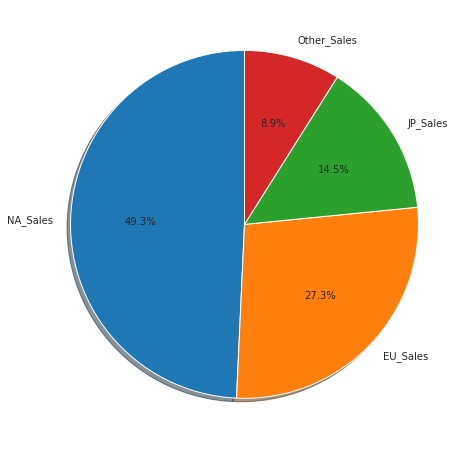

In [33]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()


## What other questions you would want to get answered?

## What useful insights would you like to take to the stakeholders planning to come up with a new game?

## Take away activity : Understand the data more, complete the analysis keeping in mind the above business stakeholder question or any other and share your notebook on slack
